# Secondary School Students - Romantic interest

In [39]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [56]:
df = pd.read_csv('student-por.csv')
df.head(30)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


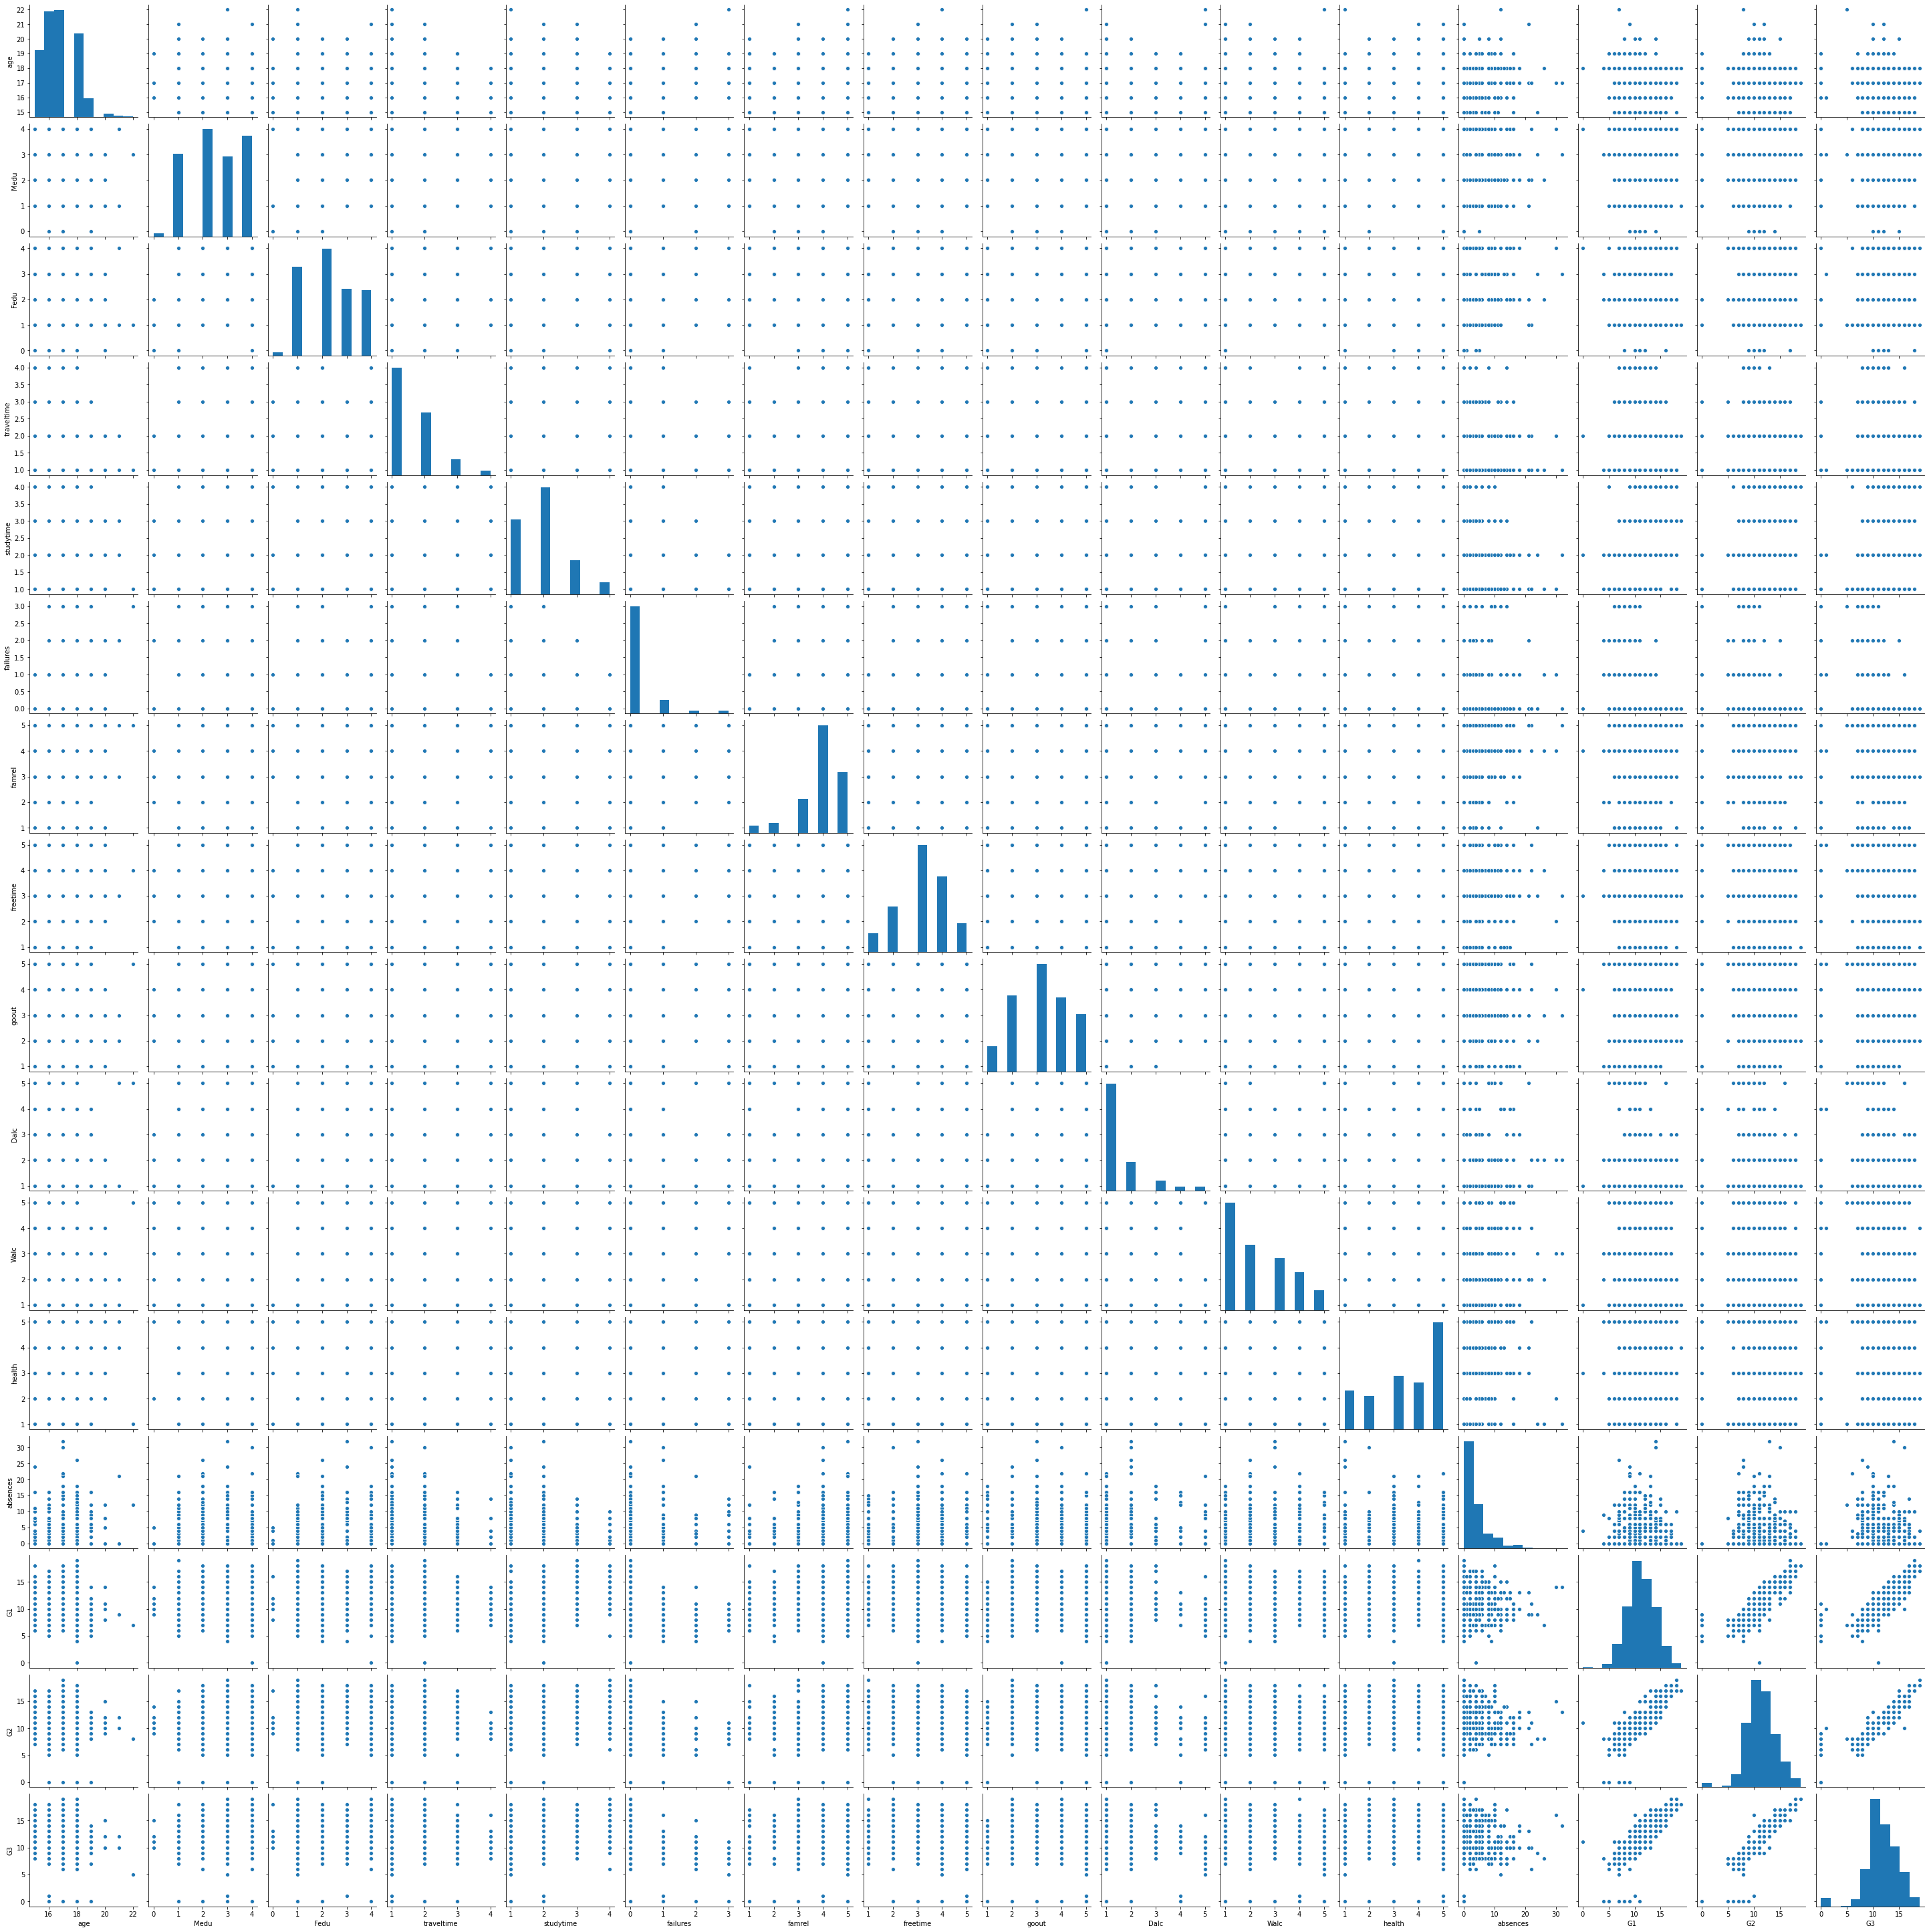

In [58]:
sns.pairplot(df)
plt.show()

Well... this doesn't seem promising...

## Choice of algorithm
For this assignment I am using K-nearest neighbor. This algorithm picks, from the data set, the nearest neighbors of the individual you want to predict for. Since the goal of the assignment is similar to the assignment in which we needed to predict the survivers of the Titanic, I chose this algorithm.

In [41]:
df['romantic'].value_counts()

no     410
yes    239
Name: romantic, dtype: int64

#### Selecting variables
I've selected the variables: romantic, famrel, freetime, goout, Dalc, Walc and health. These variables seem to be comparable and tell a lot about the person of which we try to predict have a romantic interest. 

In [42]:
df = df[['romantic','famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']]
df = df.dropna() #get rid of rows with empty cells
df.head()

,romantic,famrel,freetime,goout,Dalc,Walc,health
0,no,4,3,4,1,1,3
1,no,5,3,3,1,1,3
2,no,4,3,2,2,3,3
3,yes,3,2,2,1,1,5
4,no,4,3,2,1,2,5


The variable of 'romantic' is categorical. So let's convert them into numbers (yes == 1, no == 0)

In [43]:
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

In [44]:
df.head()

,romantic,famrel,freetime,goout,Dalc,Walc,health
0,0,4,3,4,1,1,3
1,0,5,3,3,1,1,3
2,0,4,3,2,2,3,3
3,1,3,2,2,1,1,5
4,0,4,3,2,1,2,5


In [46]:
df.info() #just to check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   romantic  649 non-null    int64
 1   famrel    649 non-null    int64
 2   freetime  649 non-null    int64
 3   goout     649 non-null    int64
 4   Dalc      649 non-null    int64
 5   Walc      649 non-null    int64
 6   health    649 non-null    int64
dtypes: int64(7)
memory usage: 40.6 KB


## Building the model and split sets

In [47]:
X = df[['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']] #create the X matrix

y = df['romantic'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,famrel,freetime,goout,Dalc,Walc,health
358,3,2,4,1,4,1
74,4,3,3,2,4,5
640,5,4,3,4,3,3
423,4,3,3,1,3,5
61,5,5,5,5,5,5


Let's use the KNeightborsClassifier class from sklearn:

In [80]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=6) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

## Model evaluation

Let's start by calculating accuracy. As always, we do the evaluation on the test data.

In [81]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.6358974358974359

The accuracy is 64%
Let's create a confusion matrix to evaluate precision and recall.

In [82]:
#make a confusion matrix
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[113,  15],
       [ 56,  11]])

In [84]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['R_interest', 'No_r_interest'], columns = ['R_interest_p', 'No_r_interest_p']) 
conf_matrix

,R_interest_p,No_r_interest_p
R_interest,113,15
No_r_interest,56,11


#### Accuracy

Let's start with the accuracy. We already calculated it with the .score method, but just to check.


In [83]:
(113+11)/(113+56+15+11)

0.6358974358974359

Indeed, accuracy is 64%.

#### Precision (survived)

Remember precision and recall can only be calculated for an outcome, not for an entire variable (unlike accuracy). I'll calculate precision and recall for romantic interest and leave the others up for the reader to try.

Let's start with precision. This is the number of correctly predicted people with romantic interest, divided by the total number of predicted people with romantic interest. Remember: how "precise" am I in saying people with romantic interest?

In [85]:
11/(15+11)

0.4230769230769231

Precision is 42%, so it's a lot worse than the accuracy overall.

#### Recall (survived)

Now recall. This is the number of correctly predicted people with romantic interest, divided by the total number of actual people with romantic interest. Remember: how many people with romantic interest do I "recall"?

In [86]:
11/(56+11)

0.16417910447761194

The precision is even worse with 16%.

In [87]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall


With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       128
           1       0.38      0.40      0.39        67

    accuracy                           0.57       195
   macro avg       0.53      0.53      0.53       195
weighted avg       0.58      0.57      0.57       195

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.69      0.88      0.78       128
           1       0.53      0.25      0.34        67

    accuracy                           0.67       195
   macro avg       0.61      0.57      0.56       195
weighted avg       0.64      0.67      0.63       195

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       128
           1       0.36      0.34      0.35        67

    accuracy                           0.56       195
   macro avg       0.51      0.5

Uhmm, Jonas? What went wrong?

K-nearest, with 6 neighbors seem to give the best result. However, the recall and precision don't look great to me. 